                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

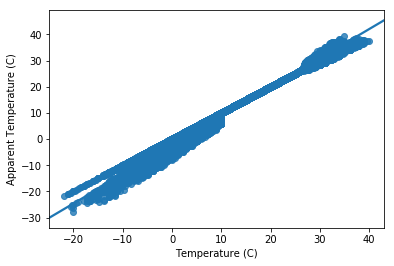

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

df=pd.read_csv("/home/shruti/Downloads/weatherHistory.csv")
print(df.head())

print(df.describe(include=['O']))

print(df.corr())

data_set=df.iloc[:,[0,3,4,5,8]]
print(data_set.corr())

sns.regplot(x=data_set["Temperature (C)"],y=data_set["Apparent Temperature (C)"])


In [ ]:
#sns.regplot(x=data_set["Temperature (C)"], y=data_set["Apparent Temperature (C)"])


In [ ]:
outliers=[]
def dect_outliers(data_1):
    limit=3
    mean=np.mean(data_1)
    std=np.std(data_1)
    for y in data_1:
        z_score=(y-mean)/std
        if np.abs(z_score)>= limit:
            outliers.append(y)
    return outliers
outlier_data=dect_outliers(data_set["Apparent Temperature (C)"])
print(outlier_data)

In [ ]:
final_data_set=data_set[data_set["Apparent Temperature (C)"]>0.15]
print(final_data_set)

In [ ]:
sns.regplot(x=final_data_set["Temperature (C)"],y=final_data_set["Apparent Temperature (C)"])

In [ ]:
y=final_data_set.iloc[:,[1]]
print(y)
X=final_data_set.iloc[:,[2]]
print(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
regressor.coef_


In [ ]:
regressor.intercept_

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

In [ ]:
regressor.score(X,y)


In [ ]:
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
import statsmodels.api as sm
ones_1 =[1] * X.count()
X["b0"]=ones_1

In [ ]:
model = sm.OLS(y_pred,X_test).fit()
model.summary()

In [ ]:
alpha=0.0001
iterations=1000

m=len(X_train)
print(m)
def gradient_descent():
    y_pred=np.array(0)
    w=b=i=0
    db=0
    dw=0
    while i < iterations:
        for j in range(m):
            db +=((b+w*X_train[j])-y_train[j])
            dw +=((b+w*X_train[j])-y_train[j])*X_train[j]
        b= b-((alpha*db)/m)
        w= w-((alpha*dw)/m)
        i+=1
    for i in range(len(X_test)):
        y_pred=(b+w*X_test)
        y_pred=float(str(y_pred)[0:3])
    print("Accuracy:",avgerror(np.asarray(y_pred)),type(y_pred))




    

In [ ]:
def avgerror(y_pred_test):
    total_error=0
    for i in range(0,len(y_test)):
        total_error+=abs((y_pred_test[i] - y_test[i])/y_test[i])
    total_error=total_error/len(y_test)
    accuracy=1- total_error
    return accuracy * 100

In [ ]:

plt.scatter(X_test, y_test, color='g', label='whole data')
plt.plot(X_test, y_pred, color='r', label='predicted value')
plt.legend()
plt.show()

if __name__=='__main__':

    gradient_descent()
